In [ ]:
#The Sparks Foundation
#Name:Bilel Kort
#Task 1:Prediction using supervised ML 
#Predict the percentage of an student based on the no of study hours

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#importing Data
url = 'http://bit.ly/w-data'
data = pd.read_csv(url,header=0,skip_blank_lines=True)

In [3]:
#display the first 5 line
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print(f'number of records:{data.shape[0]}')
print(f'number of features:{data.shape[1]}')

number of records:25
number of features:2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
#get the mean of hours
mean_hours = data['Hours'].mean()
mean_hours

5.012

In [8]:
#get the number of records that have more than mean hours
data[data['Hours'] >= mean_hours].count()

Hours     12
Scores    12
dtype: int64

In [9]:
#check for nan values
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
# check duplicates 
print("duplicates:", data.duplicated().sum())

duplicates: 0


<AxesSubplot: >

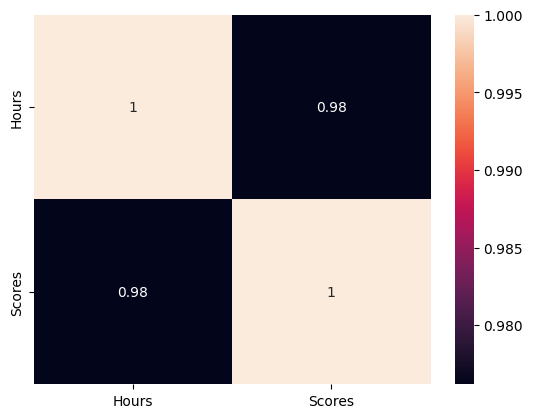

In [11]:
#the correlation between scores and hours through a heat map
sns.heatmap(data.corr(),annot=True)

C:\Users\kortb\AppData\Local\Temp\ipykernel_7312\426670640.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Scores,kde=True,color='g')


<AxesSubplot: xlabel='Scores', ylabel='Density'>

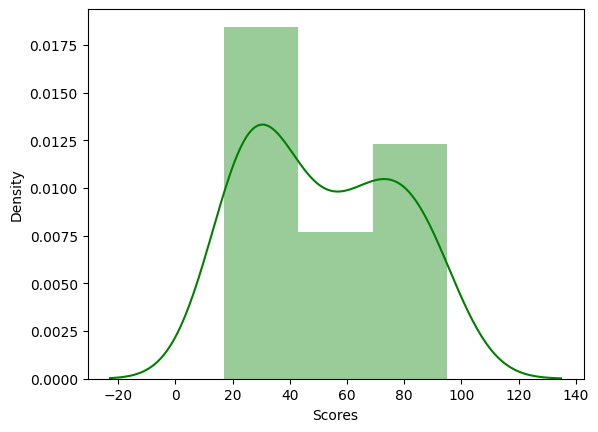

In [12]:
#Distribution plot 
sns.distplot(data.Scores,kde=True,color='g')

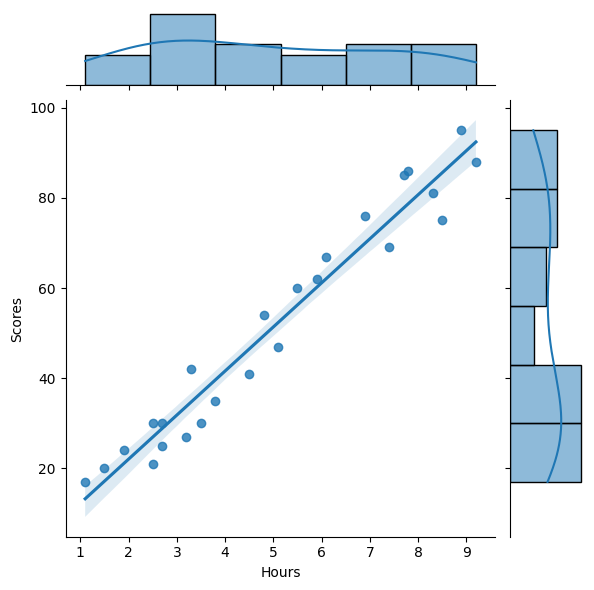

In [13]:
#JoinPlot that match hours and scores with scatter 'reg'
sns.jointplot(x='Hours',y='Scores',data=data,kind='reg')

In [77]:
x = data.drop('Scores', axis = 1).values
y = data['Scores'].values
x,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



In [91]:
X_train, X_test, y_train, y_test = train_test_split(
          x, y, test_size=0.3, random_state=123)

In [92]:
X_train.shape, y_train.shape

((17, 1), (17,))

In [93]:
logmodel = make_pipeline(StandardScaler(copy=True,with_mean=True,with_std=True),LinearRegression())

logmodel.fit(X_train,y_train)

logmodel.score(X_test,y_test)

0.9549410139157177

In [94]:
print('Test Score: ', logmodel.score(X_test,y_test))
print('Training Score: ', logmodel.score(X_train,y_train))

Test Score:  0.9549410139157177
Training Score:  0.9461984259690377


In [106]:
y_pred = logmodel.predict(X_test)
y_pred

array([16.80559189, 48.44388816, 38.85652565, 60.90745942, 87.75207444,
       81.99965694, 55.15504192, 58.98998692])

In [103]:
logmodel.score(X,y)

0.9509533216777594

In [107]:
pred = pd.DataFrame({'Actual': y_test, 'Pred': y_pred})
pred

,Actual,Pred
0,20,16.805592
1,54,48.443888
2,35,38.856526
3,67,60.907459
4,95,87.752074
5,81,81.999657
6,60,55.155042
7,62,58.989987


In [108]:
# EVALUATE OUR MODEL
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', MSE)
print('R2 Score: ', r2)

Mean squared error:  22.391499897258026
R2 Score:  0.9549410139157177


In [110]:
#  What will be predicted score if a student studies for 6.75 hrs/ day?

Hours = 6.75
Hrs = np.array(Hours).reshape(-1,1)  
pred = logmodel.predict(Hrs)

print('No. of Hours = {}'.format(Hours))
print('Pred Score = {}'.format(round(pred[0],3)))
Hrs = np.array(Hours).reshape(-1,1)  
pred = logmodel.predict(Hrs)

No. of Hours = 6.75
Pred Score = 67.139
